In [1]:
from textblob import TextBlob
import tweepy
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import simpledialog

In [2]:
ROOT = tk.Tk()

ROOT.withdraw()

topicc = simpledialog.askstring(title="find the polarity",
                                  prompt="Topic :")

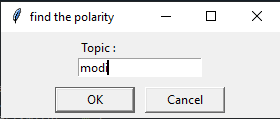

In [3]:
api_key="gICXQZhWQmipvPfedRgh8L8oE"
secret_key="irXRsXDdhDMqi02SzKMujLsHROT4vMJMuQWkwI23hSjQKWNx6T"
access_token="1137431215642796032-g88ONTeH8YaTooetbthksRnT3VuptF"
secret_acces_token="e0ERt7zSj5xf9YjYKp1RfPdG7ypGexQ2XNY1B5HQazGyK"

auth_handler=tweepy.OAuthHandler(consumer_key=api_key, consumer_secret=secret_key)
auth_handler.set_access_token(access_token, secret_acces_token)

api=tweepy.API(auth_handler)

In [4]:
search_term=topicc
tweet_amont=simpledialog.askinteger(title="Number of tweets to scroll through",
                                  prompt="your answer in inter form:")

tweets=tweepy.Cursor(api.search,q=search_term,lang='en').items(tweet_amont)

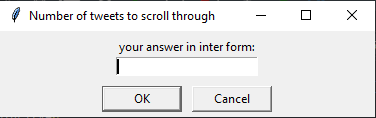

In [5]:
polarity=0
positive=0
negative=0
neutral=0

In [6]:
for tweet in tweets:
    f_text=tweet.text.replace("RT",'')
    if f_text.startswith('  @'):
        pos=f_text.index(":")
        f_text=f_text[pos+2:]
    if f_text.startswith('@'):
        pos = f_text.index(' ')
        f_text = f_text[pos+2:]
    analysis = TextBlob(f_text)
    tweet_polarity=analysis.polarity
    if tweet_polarity>0:
        positive+=1
    elif tweet_polarity<0:
        negative+=1
    else:
         neutral+=1    
    polarity += analysis.polarity

In [7]:
print(polarity)
print("Amount of positive tweets:",positive)
print("Amount of negative tweets:",negative)
print("Amount of netural tweets:",neutral)

11.060444173881676
Amount of positive tweets: 72
Amount of negative tweets: 40
Amount of netural tweets: 88


In [8]:
data=[positive,negative,neutral]
label=['positive','negative','neutral']

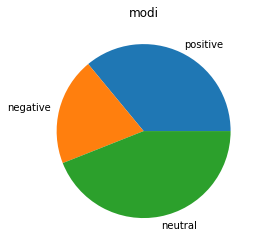

In [9]:
plt.pie(data,labels=label)
plt.title(topicc)
plt.show()

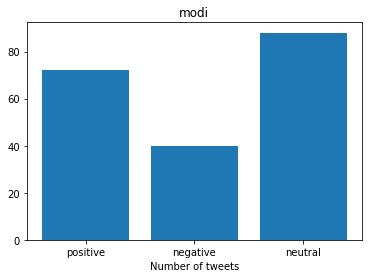

In [10]:
plt.bar(label,data)
plt.title(topicc)
plt.xlabel("Number of tweets")
plt.show()